# Double clustering

In [1]:
import seaborn as sns
import scipy
import numpy as np
from matplotlib import pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial import distance
from scipy.cluster import hierarchy

In [2]:
path = '/home/smauran/Developpement/QG_standalone_counillon_assim4pdt/analyse_R5_seuil10_infl102_1/'
# Chargement des données
cycle = 500
Data = np.load(path+'E_av/E_av_'+str(cycle)+'.npy')
print(Data.shape)

N =29

(29, 16641)


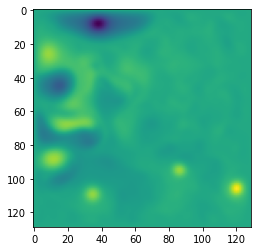

In [5]:
mean_ens = np.mean(Data,axis=0)

Matmembre=np.reshape(Data[15,:],(129,129),order='F')
Matmean=np.reshape(mean_ens,(129,129),order='F')

var = np.var(Data.T,axis=1)
Matvar=np.reshape(var,(129,129),order='F')

plt.imshow(Matmembre)

#plt.imsave("ens_149.png",Matmean)


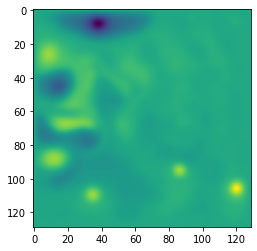

In [6]:
fig, ax = plt.subplots()
ax.imshow(Matmean)
plt.show()

In [ ]:
plt.imshow(Matvar)
#plt.imsave("Matvar.png",Matvar)

# Kmeans


In [ ]:
from sklearn.cluster import KMeans

numclus=4

# Kmeans pour numclus classes
kmeans = KMeans(n_clusters=numclus, random_state=0).fit(Data.T)


# Affichage du clustering pour numclus classes
MatKM=np.reshape(kmeans.labels_,(129,129),order='F')

plt.imshow(MatKM)
plt.title('Résultat du Kmeans')

In [ ]:
import skimage as ski
from skimage import feature
from skimage import measure


# Clustering géométrique via détection de contours
for i in range(numclus):
  vec=np.zeros((129*129,1))
  # extraction des éléments de la classe i
  ind=np.where(kmeans.labels_==np.int64(i))
  vec[ind]=1
  Imclusk=np.reshape(vec,(129,129),order='F')

  # détection des contours fermés des classes
  contours = measure.find_contours(Imclusk,0)
  print('Nbre de contours pour la classe', np.int64(i),'=', len(contours))

  # Affichage de la classe et des contours détectés
  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.set_title('Image de la Classe' )
  ax2.set_title('Détection de contours géométriques')
  ax1.imshow(Imclusk)
  ax2.set_xlim([0,129])
  ax2.set_ylim([0,129])
  ax2.set_aspect('equal')
  for contour in contours:
    ax2.plot(contour[:, 1],129-contour[:, 0], linewidth=2)
  plt.show()


## Détermination du nombre de classes optimal avec l'inertie c'est-à-dire la variance intra classe

In [ ]:
from sklearn.cluster import KMeans

nblimit=50
vec_inertie=np.zeros((nblimit,1))

for i in range(nblimit):
    nb=np.int64(i+1)
    kmeans = KMeans(n_clusters=nb, random_state=0, n_init='auto').fit(Data.T)
    vec_inertie[i]=kmeans.inertia_
    print('Test nbre de classes=',nb)

# Affichage de l'inertie en fonction des classes
plt.plot(vec_inertie)

# on recherche un nombre de classe tel qu'on obtienne un coude/plateau

# A tester : indice de Dunn, très utilisé en clustering (équivalent à silhouette) code dispo en numpy

## Indice de Davies Bouldin

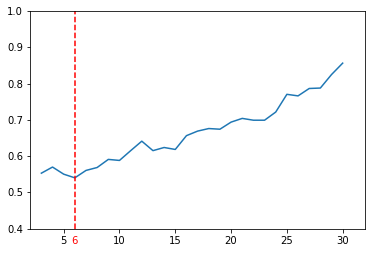

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

nblimit=30
vec_bouldin=np.zeros((nblimit+1,1))

for i in range(1,nblimit+1):
    nb=np.int64(i+1)
    kmeans = KMeans(n_clusters=nb, random_state=0, n_init='auto').fit(Data.T)
    vec_bouldin[i]=davies_bouldin_score(Data.T,kmeans.labels_)
    #print('Test nbre de classes=',nb)
    #print(davies_bouldin_score(Data.T,kmeans.labels_))


min_value = np.min(vec_bouldin)
min_index = np.argmin(vec_bouldin[3:])+3
indices = np.arange(3, len(vec_bouldin))

# Affichage de l'inertie en fonction des classes
fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
ax.plot(indices, vec_bouldin[3:])
ax.set_ylim(0.4,1)
ax.set_xlim(2,32)

plt.axvline(x=min_index, color='r', linestyle='--', label=f'Minimum à l\'indice {min_index}')
plt.text(min_index, 0.38, f'{min_index}', color='r', ha='center', va='top', fontsize=10)
# Ajouter des annotations
#plt.text(min_index, min_value, f'{min_value:.2f}', color='r', ha='right', va='bottom')
fig.savefig(path+'analyse_davies_bouldin/IDB_'+str(cycle)+'.png')  

#plt.title("Calcul de l'indice de Davies Bouldin jusqu'à 50 clusters")


6
score davies bouldin 0.5500756573165746


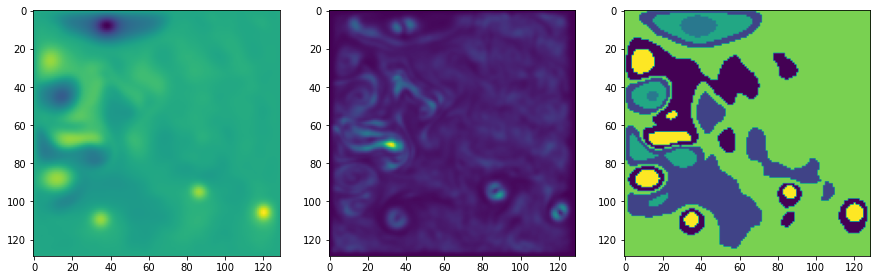

In [14]:
''' tol = 5*10**-2

min_s=[]
for k in range(2,nblimit):
    if abs(vec_bouldin[k]-vec_bouldin[nblimit-1]) <tol:
        min_s.append(k)
print(min_s)

numclus=min_s[0] '''
numclus=np.argmin(vec_bouldin[3:])+3
print(numclus)

# Kmeans pour numclus classes
kmeans = KMeans(n_clusters=numclus, random_state=0, n_init='auto').fit(Data.T)

print("score davies bouldin",davies_bouldin_score(Data.T,kmeans.labels_))


# Affichage du clustering pour numclus classes
MatKM=np.reshape(kmeans.labels_,(129,129), order='F')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(15)
ax3.imshow(MatKM)
ax1.imshow(Matmean)
ax2.imshow(Matvar)
fig.savefig(path+'1ere_passe_save_'+str(cycle)+'.png')  


## Détection de contours

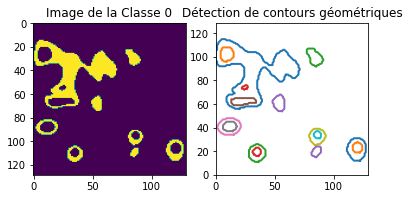

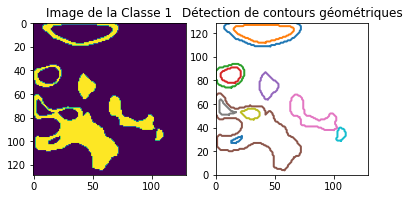

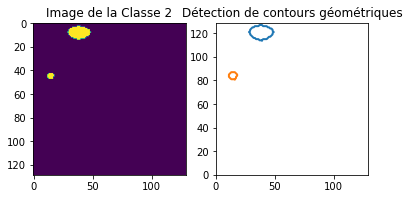

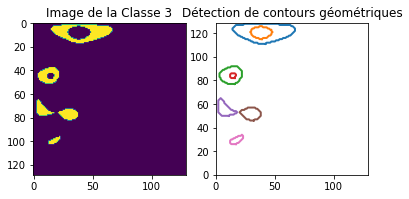

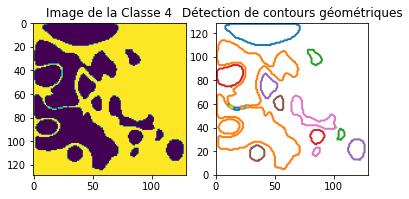

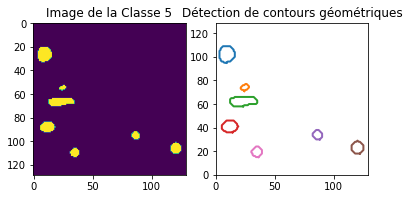

In [20]:
from skimage import measure
from matplotlib.path import Path
from math import ceil
j = 129
i = 129
for c in range(numclus):
        vec=np.zeros((i*j,1))
        # extraction des elements de la classe i
        inds = [index for (index,cluster) in enumerate(kmeans.labels_) if cluster == c]
        #dist_xx_ii = dist_xx[:,ind]
        #dist_xx_ii = dist_xx_ii[ind,:]

        vec[inds]=1
        Imclusk=np.reshape(vec,(j,i),order='F')


        # detection des contours fermes des classes
        contours = measure.find_contours(Imclusk,0)

        # Affichage de la classe et des contours détectés
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.set_title('Image de la Classe '+str(c) )
        ax2.set_title('Détection de contours géométriques')
        ax1.imshow(Imclusk)
        ax2.set_xlim([0,129])
        ax2.set_ylim([0,129])
        ax2.set_aspect('equal')
        for contour in contours:
                ax2.plot(contour[:, 1],129-contour[:, 0], linewidth=2)
        plt.show()
        if c==1:
                fig.savefig(path+'detec_contours'+str(cycle)+'.png')  

In [28]:
from skimage import measure
from matplotlib.path import Path
from math import ceil
from tools.localisation import nd_Id_cluster_loc_state

Nx = Data.shape[1]
i_dom = 129
j_dom = 129
shape=(i_dom,j_dom)
nb_clusters=1
labels = np.zeros(Nx)
loc_state = nd_Id_cluster_loc_state(shape[::-1], periodic=False)
dist_xx,state_taperer = loc_state(10,'GC')
seuil = 10
R=5


def get_clusters(E,loc,rad,taper,j,i):
    # clustering sur les variables
    N, Nx = E.shape
    #print(N,Nx) 
    
    
    dist_xx, state_taperer = loc(rad,taper)

    nblimit=30
    vec_bouldin=np.zeros((nblimit,1))

    for k in range(1,nblimit):
        nb=np.int64(k+1)
        kmeans = KMeans(n_clusters=nb, random_state=0, n_init = 'auto').fit(E.T)
        vec_bouldin[k]=davies_bouldin_score(E.T,kmeans.labels_)

    #tol = 5*10**-2

    ''' min_s=[]
    for k in range(2,nblimit):
        if abs(vec_bouldin[k]-vec_bouldin[nblimit-1]) <tol:
            min_s.append(k) '''
    #print(min_s) 

    #nb_min=min_s[0]
    nb_min=np.argmin(vec_bouldin[3:])+3
    #print("nb min", nb_min)

    kmeans = KMeans(n_clusters=nb_min, random_state=0, n_init = 'auto').fit(E.T)

    # 2me passe de clustering avec les contours
    
    labels = np.zeros(Nx)
    nb_clusters = 1

    # Clustering geometrique via detection de contours
    for c in range(nb_min):
        vec=np.zeros((i*j,1))
        # extraction des elements de la classe i
        inds = [index for (index,cluster) in enumerate(kmeans.labels_) if cluster == c]
        #dist_xx_ii = dist_xx[:,ind]
        #dist_xx_ii = dist_xx_ii[ind,:]

        vec[inds]=1
        Imclusk=np.reshape(vec,(j,i),order='F')


        # detection des contours fermes des classes
        contours = measure.find_contours(Imclusk,0)
        print('Nbre de contours pour la classe', np.int64(c),'=', len(contours))
        for num_contour in range(len(contours)):
                non_vide=False
                l_abs=[]
                l_ord=[]
                for ind in inds: # quels points du cluster sont dans le contour considéré ?
                    abs = ind%j
                    ord = ind//i
                    cluster_contour = np.array(contours[num_contour]).reshape(-1, 2)
                    path = Path(cluster_contour)
                    if path.contains_point((abs,ord)):
                            non_vide=True
                            l_abs.append(abs)
                            l_ord.append(ord)
                            labels[ind] = nb_clusters

                if non_vide:
                    inds_maj = [index for (index,cluster) in enumerate(labels) if cluster == nb_clusters]
                    abs_min = min(l_abs)
                    abs_max = max(l_abs)
                    ord_min = min(l_ord)
                    ord_max = max(l_ord)
                    # Idée pour les clusters trop petits : les mettre à -1 tant qu'on n'a pas trouvé le cluster vide, puis les rajouter au cluster vide
                    if len(inds_maj) < 0.001*i*j:
                        labels[inds_maj] = np.zeros(len(inds_maj))
                        

                    elif abs_max - abs_min > seuil or ord_max - ord_min > seuil :
                            dist_xx_ii = dist_xx[:,inds_maj]
                            dist_xx_ii = dist_xx_ii[inds_maj,:]
                            nc = int(ceil((abs_max - abs_min)/seuil)*ceil((ord_max - ord_min)/seuil))
                            kmeans_dist = KMeans(n_clusters=nc, random_state=0, n_init = 'auto').fit(dist_xx_ii)
                            labels[inds_maj] = nb_clusters*np.ones(len(inds_maj)) + kmeans_dist.labels_
                            nb_clusters += kmeans_dist.n_clusters
                    else:
                            nb_clusters += 1



    ## On s'occupe du contour "exterieur", label 0
    inds_0 = [index for (index,cluster) in enumerate(labels) if cluster == 0]
    l_abs_0=[]
    l_ord_0=[]
    for ind in inds_0:
        abs = ind%i
        ord = ind//j
        l_abs_0.append(abs)
        l_ord_0.append(ord)

    abs_min_0 = min(l_abs_0)
    abs_max_0 = max(l_abs_0)
    ord_min_0 = min(l_abs_0)
    ord_max_0 = max(l_abs_0)
    
    if abs_max_0 - abs_min_0 > seuil or ord_max_0 - ord_min_0 > seuil :

        dist_xx_ii = dist_xx[:,inds_0]
        dist_xx_ii = dist_xx_ii[inds_0,:]
        nc = int(ceil((abs_max_0 - abs_min_0)/seuil)*ceil((ord_max_0 - ord_min_0)/seuil))
        kmeans_dist = KMeans(n_clusters=nc, random_state=0, n_init = 'auto').fit(dist_xx_ii)
        
        labels[inds_0] = nb_clusters*np.ones(len(inds_0)) + kmeans_dist.labels_
        nb_clusters += kmeans_dist.n_clusters

    #print(davies_bouldin_score(E.T,labels))
    print("label max apres prise en compte des contours et redecoupage des gros clusters : ", nb_clusters)



    unique_labels = np.unique(labels)
    print("nb clusters reel", len(unique_labels))
    #return(labels, nb_clusters, len(unique_labels),state_taperer,nb_min)
    return(labels)


Nbre de contours pour la classe 0 = 15
Nbre de contours pour la classe 1 = 11
Nbre de contours pour la classe 2 = 2
Nbre de contours pour la classe 3 = 7
Nbre de contours pour la classe 4 = 17
Nbre de contours pour la classe 5 = 7
label max apres prise en compte des contours et redecoupage des gros clusters :  364
nb clusters reel 363


" for c in range(nb_clusters):\n  vec=np.zeros((129*129,1))\n  # extraction des éléments de la classe i\n  inds = [index for (index,cluster) in enumerate(labels) if cluster == c]\n  print(c, len(inds))\n  #dist_xx_ii = dist_xx[:,ind]\n  #dist_xx_ii = dist_xx_ii[ind,:]\n  if len(inds) != 0:\n    vec[inds]=1\n    Imclusk=np.reshape(vec,(129,129),order='F')\n    fig, ax = plt.subplots()\n    ax.imshow(Imclusk) "

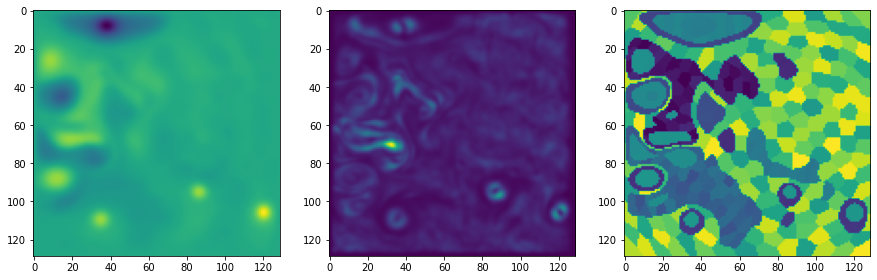

In [29]:
labels = get_clusters(Data,loc_state,R,state_taperer,j_dom,i_dom)

#print("label max après prise en compte des contours et redécoupage des gros clusters : ", nb_clusters)

mean_ens = np.mean(Data,axis=0)
Matmean=np.reshape(mean_ens,(129,129),order='F')




MatKM=np.reshape(labels,(129,129),order='F')
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
ax3.imshow(MatKM)
ax1.imshow(Matmean)
ax2.imshow(Matvar)
fig.savefig(path+'clusters_'+str(cycle)+'_save.png')
#plt.title('Résultat du Kmeans après prise en compte des contours')

'''unique_labels = np.unique(labels)
nb_clusters_reel = len(unique_labels)
print("nb clusters réel", len(unique_labels))'''

''' for c in range(nb_clusters):
  vec=np.zeros((129*129,1))
  # extraction des éléments de la classe i
  inds = [index for (index,cluster) in enumerate(labels) if cluster == c]
  print(c, len(inds))
  #dist_xx_ii = dist_xx[:,ind]
  #dist_xx_ii = dist_xx_ii[ind,:]
  if len(inds) != 0:
    vec[inds]=1
    Imclusk=np.reshape(vec,(129,129),order='F')
    fig, ax = plt.subplots()
    ax.imshow(Imclusk) '''
    

In [11]:
#from tools.localisation import nd_Id_localization


order='F'
def f2py(X): return X.flatten(order=order)

def equi_spaced_integers(m,p):
    """Provide a range of p equispaced integers between 0 and m-1"""
    return np.round(np.linspace(np.floor(m/p/2),np.ceil(m-m/p/2-1),p)).astype(int)

In [13]:
batch_shape = [2, 2]
shape =(129,129)
obs = np.load('/home/smauran/Developpement/QG_standalone_counillon/obs_148.npy')
rad=17
infl =1.04

# This will look like satellite tracks when plotted in 2D
Ny = 300
jj = equi_spaced_integers(129*129, Ny)
tend = 1880.0
dtout = 10.0


# Want: random_offset(t1)==random_offset(t2) if t1==t2.
# Solutions: (1) use caching (ensure maxsize=inf) or (2) stream seeding.
# Either way, use a local random stream to avoid interfering with global stream
# (and e.g. ensure equal outcomes for 1st and 2nd run of the python session).
rstream = np.random.RandomState()
max_offset = min(jj[1]-jj[0],129*129-jj[-1])


def random_offset(tend,dtout): 
    rstream.seed(int(tend/dtout*100)) 
    u = rstream.rand()
    return int(np.floor(max_offset * u))


def obs_inds(tend,dtout):
    return jj + random_offset(tend,dtout)


obs_ind = obs_inds(tend,dtout)


#loc = nd_Id_localization(shape[::-1], batch_shape[::-1], obs_ind, periodic=False)



In [14]:
from tools.linalg import mldiv


def Newton_m(fun, deriv, x0, is_inverted=False,
             conf=1.0, xtol=1e-4, ytol=1e-7, itermax=10**2):
    """Find root of `fun`.

    This is a simple (and pretty fast) implementation of Newton's method.
    """
    itr, dx, Jx = 0, np.inf, fun(x0)
    def norm(x): return np.sqrt(np.sum(x**2))
    while ytol < norm(Jx) and xtol < norm(dx) and itr < itermax:
        Dx  = deriv(x0)
        if is_inverted:
            dx  = Dx @ Jx
        elif isinstance(Dx, float):
            dx  = Jx/Dx
        else:
            dx  = mldiv(Dx, Jx)
        dx *= conf
        x0 -= dx
        Jx  = fun(x0)
    return x0

def hyperprior_coeffs(s, N, xN=1, g=0):
    r"""Set EnKF-N inflation hyperparams.

    The EnKF-N prior may be specified by the constants:

    - eN: Effect of unknown mean
    - cL: Coeff in front of log term

    These are trivial constants in the original EnKF-N,
    but are further adjusted (corrected and tuned) for the following reasons.

    - Reason 1: mode correction.
      These parameters bridge the Jeffreys (`xN=1`) and Dirac (`xN=Inf`) hyperpriors
      for the prior covariance, B, as discussed in `bib.bocquet2015expanding`.
      Indeed, mode correction becomes necessary when $$ R \rightarrow \infty $$
      because then there should be no ensemble update (and also no inflation!).
      More specifically, the mode of `l1`'s should be adjusted towards 1
      as a function of $$ I - K H $$ ("prior's weight").
      PS: why do we leave the prior mode below 1 at all?
      Because it sets up "tension" (negative feedback) in the inflation cycle:
      the prior pulls downwards, while the likelihood tends to pull upwards.

    - Reason 2: Boosting the inflation prior's certainty from N to xN*N.
      The aim is to take advantage of the fact that the ensemble may not
      have quite as much sampling error as a fully stochastic sample,
      as illustrated in section 2.1 of `bib.raanes2019adaptive`.

    - Its damping effect is similar to work done by J. Anderson.

    The tuning is controlled by:

    - `xN=1`: is fully agnostic, i.e. assumes the ensemble is generated
      from a highly chaotic or stochastic model.
    - `xN>1`: increases the certainty of the hyper-prior,
      which is appropriate for more linear and deterministic systems.
    - `xN<1`: yields a more (than 'fully') agnostic hyper-prior,
      as if N were smaller than it truly is.
    - `xN<=0` is not meaningful.
    """
    N1 = N-1

    eN = (N+1)/N
    cL = (N+g)/N1

    # Mode correction (almost) as in eqn 36 of `bib.bocquet2015expanding`
    prior_mode = eN/cL                        # Mode of l1 (before correction)
    diagonal   = pad0(s**2, N) + N1           # diag of Y@R.inv@Y + N1*I
    #                                           (Hessian of J)
    I_KH       = np.mean(diagonal**(-1))*N1   # ≈ 1/(1 + HBH/R)
    # I_KH      = 1/(1 + (s**2).sum()/N1)     # Scalar alternative: use tr(HBH/R).
    mc         = np.sqrt(prior_mode**I_KH)       # Correction coeff

    # Apply correction
    eN /= mc
    cL *= mc

    # Boost by xN
    eN *= xN
    cL *= xN

    return eN, cL

def effective_N(YR, dyR, xN, g):
    """Effective ensemble size N.

    As measured by the finite-size EnKF-N
    """
    N, Ny = YR.shape
    N1   = N-1

    V, s, UT = svd0(YR)
    du     = UT @ dyR

    eN, cL = hyperprior_coeffs(s, N, xN, g)

    def pad_rk(arr): return pad0(arr, min(N, Ny))
    def dgn_rk(l1): return pad_rk((l1*s)**2) + N1

    # Make dual cost function (in terms of l1)
    def J(l1):
        val = np.sum(du**2/dgn_rk(l1)) \
            + eN/l1**2 \
            + cL*np.log(l1**2)
        return val

    # Derivatives (not required with minimize_scalar):
    def Jp(l1):
        val = -2*l1   * np.sum(pad_rk(s**2) * du**2/dgn_rk(l1)**2) \
            + -2*eN/l1**3 \
            + 2*cL/l1
        return val

    def Jpp(l1):
        val = 8*l1**2 * np.sum(pad_rk(s**4) * du**2/dgn_rk(l1)**3) \
            + 6*eN/l1**4 \
            + -2*cL/l1**2
        return val

    # Find inflation factor (optimize)
    l1 = Newton_m(Jp, Jpp, 1.0)
    # l1 = fmin_bfgs(J, x0=[1], gtol=1e-4, disp=0)
    # l1 = minimize_scalar(J, bracket=(sqrt(prior_mode), 1e2), tol=1e-4).x

    za = N1/l1**2
    return za

In [24]:
from tools.randvars import GaussRV
from tools.linalg import pad0, svd0
from tools.post_process import post_process
import scipy.linalg as sla


from tools.localisation import safe_eval, pairwise_distances, dist2coeff
def LETKF(E, t, Eo, y, hnoise, rad, infl):
    # Decompose ensmeble
    #Constantes
    xN = 1.0
    g = 0
    taper='GC'

    _map = map
    #noise=0
    #E = add_noise(E, dtout, noise, 'Stoch')
    R, N1 = hnoise.C, N-1
    mu = np.mean(E, 0)
    
    #print("err relative",np.linalg.norm(mu-truth)/np.linalg.norm(truth))
    
    A  = E - mu
    # Obs space variables
    xo = np.mean(Eo, 0)  # Obs ens mean
    Y  = Eo-xo           # Obs ens anomalies (HX_f)
    # Transform obs space
    Y  = Y        @ R.sym_sqrt_inv.T
    dy = (y - xo) @ R.sym_sqrt_inv.T
    

    # Local analyses
    # Get localization configuration
    

    def local_analysis(ii):
        """Do the local analysis.

        Notation:

        - ii: inds for the state batch defining the locality
        - jj: inds for the associated obs
        """
        # Locate local obs
        jj=[]
        for i_c in ii:
            if i_c in obs_ind:
                j =np.where(obs_ind==i_c)
                jj.append(j[0][0])
        if len(ii)<10 and len(ii) !=0 :
        #if 713 in ii:
            #print(len(ii))
            print(ii)
            print(len(jj))
            print(obs_ind[jj])
            def ind2sub(ind):
                return np.asarray(np.unravel_index(ind, shape)).T
            state_coord = ind2sub(np.arange(129*129))
            def y2x_distances(t):
                obs_coord = ind2sub(safe_eval(obs_ind, t))
                return pairwise_distances(obs_coord, state_coord, None)
            y2x = y2x_distances(int(t))
            x2y = y2x.T
            dists = x2y[ii].mean(axis=0)
            #print(len(dists))
            #print(dists)
            coeffs = dist2coeff(dists, rad, 'GC')

            # Truncate using cut-off
            inds   = np.arange(len(dists))[coeffs > 1e-3]
            #print(len(dists[inds]))
            #(dists[inds])




        
        if len(jj) == 0:
            return E[:, ii], N1  # no update
        Y_jj   = Y[:, jj]
        dy_jj  = dy[jj]

        # Adaptive inflation
        za = effective_N(Y_jj, dy_jj, xN, g) if infl == '-N' else N1
        # Taper
        #Y_jj  *= np.sqrt(tapering)
        #dy_jj *= np.sqrt(tapering)

        # Compute ETKF update
        if len(jj) < N:
            # SVD version
            V, sd, _ = svd0(Y_jj)
            d      = pad0(sd**2, N) + za
            Pw     = (V * d**(-1.0)) @ V.T
            T      = (V * d**(-0.5)) @ V.T * np.sqrt(za)
        else:
            # EVD version
            d, V   = sla.eigh(Y_jj@Y_jj.T + za*np.eye(N))
            T     = V@np.diag(d**(-0.5))@V.T * np.sqrt(za)
            Pw    = V@np.diag(d**(-1.0))@V.T
        AT  = T @ A[:, ii]
        dmu = dy_jj @ Y_jj.T @ Pw @ A[:, ii]
        Eii = mu[ii] + dmu + AT
        return Eii, za

    # Run local analyses
    state_batches = []
    for c in range(nb_clusters):
        i_cluster = [index for (index,cluster) in enumerate(labels) if cluster == c]
        state_batches.append(i_cluster)
    EE, za = zip(*_map(local_analysis, state_batches))
    for ii, Eii in zip(state_batches, EE):
        E[:, ii] = Eii
    #print("E après assim",E[0,:])
    E = post_process(E,infl,rot=True)
    return E,np.linalg.norm(xo)

#print(obs_ind)

#E = LETKF(E, tend, E[:,obs_ind], y_obs, GaussRV(C=4*np.eye(Ny)), nd_Id_localization(shape[::-1], batch_shape[::-1], obs_ind, periodic=False), R, infl)
E,obs_mean = LETKF(Data, tend, Data[:,obs_ind], obs, GaussRV(C=4*np.eye(Ny)), rad, infl)



[]
[14, 42, 44, 51, 58, 65]
[3, 10, 12, 17, 19]
[93, 100, 107, 114, 121, 128]
[75, 82, 89, 91, 96, 98, 103, 105, 112]
[]
[120, 127, 134, 141]
[]
[]
[195, 202]
[2, 30, 60, 67, 74]
[81, 88, 95, 109, 116, 153]
[227, 234, 241, 248, 255]
[94, 101, 108, 115, 122, 129, 136]
[6, 11, 13, 27, 34, 41, 48, 55]
[178, 185, 192, 199, 206, 213, 220]
[26]
[24, 45, 47, 54]
[124, 131, 133, 138, 140, 145, 147]
[143, 150, 152, 157, 159, 164, 166, 171, 173, 180, 187]
[52, 64, 71, 73, 78, 80, 87]
[]
[217, 224, 231, 271]
[102]
[160, 188]
[9, 16, 23]
[33, 40, 49, 56, 63, 70]
[8, 15, 20, 22, 29, 31, 36, 38, 43, 50, 57]
[167, 174, 181]
[]
[21, 28, 35]
[]
[713]
0
[]
[]
[]
[119, 126, 142, 149, 154, 156, 161, 163, 168, 170, 177]
[225, 232, 239, 262, 269, 276, 283, 290, 297, 299]
[62, 69, 76, 83, 85, 90, 92, 97, 99, 104, 106, 111, 113, 118, 125, 132, 139]
[179, 186, 193, 200, 207, 209, 214, 216, 221, 223, 228, 235]
[72, 77, 79, 86]
[238, 245, 252, 254, 259, 261, 266, 268, 273, 275, 282, 289, 296]
[175, 182, 189, 194